In [40]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from numpy import inf
import datetime
import random
%matplotlib inline

In [67]:
tickers = []
with open("tickers.txt",encoding = 'utf-8') as file :
    for line in file:
        line = line.lstrip('[')
        line = line.rstrip(']\n')
        line = line.replace('\"','')
        line_list = [str(x) for x in line.split(',')]
        tickers = line_list

In [68]:
companies_list = random.sample(tickers, 10)
print(companies_list)
test_data = data.DataReader(companies_list, 'yahoo')
test_data = test_data['Adj Close']
print(companies_list)

['ASLN', 'VINP', 'EWP', 'FNDE', 'EWC', 'DINT', 'EMSG', 'PRGO', 'OCUP', 'RNDV']
['ASLN', 'VINP', 'EWP', 'FNDE', 'EWC', 'DINT', 'EMSG', 'PRGO', 'OCUP', 'RNDV']


In [3]:
test_data.dropna(axis='columns', inplace=True)
test_data.head()

Symbols,VNM,DCOM,HFC,MDYG,OGS,BSJM,CNA,BSL,BG
Date,,,,,,,,,
2016-06-06,13.919934,26.049784,22.784620,38.679317,53.506729,18.772060,22.969782,11.019287,57.528484
2016-06-07,14.061876,25.616749,23.137606,38.750896,53.789089,18.842421,22.884632,11.094954,57.272617
2016-06-08,14.288987,25.973364,22.507271,39.012329,54.459679,18.920618,22.891726,11.108714,56.718224
2016-06-09,14.222747,25.328062,22.557695,38.912743,55.580296,18.881519,22.834959,11.156860,56.428246
2016-06-10,14.024026,25.064848,22.717381,38.327633,55.306755,18.790817,22.792385,11.170616,55.780029


# Percentage change calculation

In [4]:
test_pct = test_data.pct_change().apply(lambda x: np.log(1+x))

In [5]:
test_pct.head()

Symbols,VNM,DCOM,HFC,MDYG,OGS,BSJM,CNA,BSL,BG
Date,,,,,,,,,
2016-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-07,0.010145,-0.016763,0.015373,0.001849,0.005263,0.003741,-0.003714,0.006843,-0.004458
2016-06-08,0.016022,0.013825,-0.027621,0.006724,0.012390,0.004141,0.000310,0.001239,-0.009727
2016-06-09,-0.004647,-0.025159,0.002238,-0.002556,0.020368,-0.002069,-0.002483,0.004325,-0.005126
2016-06-10,-0.014071,-0.010447,0.007054,-0.015151,-0.004934,-0.004815,-0.001866,0.001232,-0.011554


In [6]:
np_data = test_data.to_numpy().T

In [7]:
[cols, rows] = np_data.shape

In [8]:
cp_array_1 = np_data[:, 1:]
cp_array_zeros = np.zeros((np_data.shape[0],1), dtype='float64')
cp_array_concat = np.concatenate((cp_array_1,cp_array_zeros), axis=1)
np_pct = np.log(cp_array_concat/np_data)
np_pct[np_pct == -inf] = 0

/home/mauro/miniforge3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [9]:
#np_pct.T is the same as test_pct
np_pct = np.nan_to_num(np_pct)
np_pct.T

array([[ 0.01014539, -0.01676308,  0.01537349, ..., -0.00371392,
         0.00684326, -0.00445758],
       [ 0.01602179,  0.01382516, -0.02762084, ...,  0.00030992,
         0.00123949, -0.00972706],
       [-0.00464654, -0.02515859,  0.00223786, ..., -0.00248286,
         0.00432473, -0.00512572],
       ...,
       [ 0.00352733,  0.00174068, -0.02844857, ...,  0.00188581,
         0.        ,  0.00416882],
       [ 0.01498279,  0.00301569,  0.01812052, ..., -0.0002094 ,
        -0.00304792, -0.00022494],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Variance calculation

In [10]:
test_var = test_pct.var()
test_var

Symbols
VNM     0.000206
DCOM    0.000528
HFC     0.000939
MDYG    0.000186
OGS     0.000311
BSJM    0.000023
CNA     0.000315
BSL     0.000186
BG      0.000425
dtype: float64

In [11]:
np_var = np.var(np_pct, axis=1)
np_var = np.nan_to_num(np_var)

In [12]:
np_var

array([2.05321552e-04, 5.26952042e-04, 9.37312931e-04, 1.85828320e-04,
       3.10282770e-04, 2.27585232e-05, 3.14319136e-04, 1.86167386e-04,
       4.24216477e-04])

# Volatility calculation

In [13]:
np_vol = np.sqrt(np_var * 250)


In [14]:
np_vol

array([0.22656211, 0.36295731, 0.48407461, 0.21553905, 0.27851516,
       0.07542964, 0.28032086, 0.21573559, 0.32565951])

# Covariance calculation

In [15]:
test_cov = test_pct.cov()

In [16]:
test_cov

Symbols,VNM,DCOM,HFC,MDYG,OGS,BSJM,CNA,BSL,BG
Symbols,,,,,,,,,
VNM,0.000206,0.000123,0.000153,0.000123,0.000086,0.000035,0.000107,0.000072,0.000099
DCOM,0.000123,0.000528,0.000321,0.000208,0.000200,0.000049,0.000231,0.000125,0.000202
HFC,0.000153,0.000321,0.000939,0.000206,0.000155,0.000063,0.000260,0.000092,0.000175
MDYG,0.000123,0.000208,0.000206,0.000186,0.000145,0.000046,0.000164,0.000090,0.000155
OGS,0.000086,0.000200,0.000155,0.000145,0.000311,0.000041,0.000157,0.000091,0.000146
BSJM,0.000035,0.000049,0.000063,0.000046,0.000041,0.000023,0.000045,0.000033,0.000041
CNA,0.000107,0.000231,0.000260,0.000164,0.000157,0.000045,0.000315,0.000066,0.000161
BSL,0.000072,0.000125,0.000092,0.000090,0.000091,0.000033,0.000066,0.000186,0.000100
BG,0.000099,0.000202,0.000175,0.000155,0.000146,0.000041,0.000161,0.000100,0.000425


In [17]:
np_cov = np.cov(np_pct)

In [18]:
np_cov

array([[2.05484764e-04, 1.22509807e-04, 1.53200621e-04, 1.22855094e-04,
        8.56938666e-05, 3.50041422e-05, 1.07175072e-04, 7.22101657e-05,
        9.91343524e-05],
       [1.22509807e-04, 5.27370922e-04, 3.21169618e-04, 2.08232422e-04,
        1.99454947e-04, 4.87343199e-05, 2.31264571e-04, 1.24718554e-04,
        2.01968413e-04],
       [1.53200621e-04, 3.21169618e-04, 9.38058013e-04, 2.05398632e-04,
        1.55037339e-04, 6.33246478e-05, 2.60012113e-04, 9.17105895e-05,
        1.74604359e-04],
       [1.22855094e-04, 2.08232422e-04, 2.05398632e-04, 1.85976037e-04,
        1.44637518e-04, 4.63179881e-05, 1.63689564e-04, 9.01868125e-05,
        1.54811382e-04],
       [8.56938666e-05, 1.99454947e-04, 1.55037339e-04, 1.44637518e-04,
        3.10529418e-04, 4.06623913e-05, 1.56874542e-04, 9.10179218e-05,
        1.45603528e-04],
       [3.50041422e-05, 4.87343199e-05, 6.33246478e-05, 4.63179881e-05,
        4.06623913e-05, 2.27766143e-05, 4.54505207e-05, 3.26648236e-05,
        4.0

# Correlation calculation

In [19]:
test_corr = test_pct.corr()

In [20]:
test_corr

Symbols,VNM,DCOM,HFC,MDYG,OGS,BSJM,CNA,BSL,BG
Symbols,,,,,,,,,
VNM,1.000000,0.372154,0.348944,0.628456,0.339241,0.511664,0.421547,0.369049,0.335635
DCOM,0.372154,1.000000,0.456627,0.664908,0.492873,0.444664,0.567797,0.397877,0.426834
HFC,0.348944,0.456627,1.000000,0.491761,0.287257,0.433225,0.478653,0.219371,0.276677
MDYG,0.628456,0.664908,0.491761,1.000000,0.601868,0.711666,0.676759,0.484496,0.550945
OGS,0.339241,0.492873,0.287257,0.601868,1.000000,0.483500,0.501930,0.378400,0.401009
BSJM,0.511664,0.444664,0.433225,0.711666,0.483500,1.000000,0.536953,0.501431,0.416850
CNA,0.421547,0.567797,0.478653,0.676759,0.501930,0.536953,1.000000,0.271077,0.438953
BSL,0.369049,0.397877,0.219371,0.484496,0.378400,0.501431,0.271077,1.000000,0.354050
BG,0.335635,0.426834,0.276677,0.550945,0.401009,0.416850,0.438953,0.354050,1.000000


In [21]:
np_corr = np.corrcoef(np_pct)

In [22]:
np_corr

array([[1.        , 0.37215422, 0.3489441 , 0.62845597, 0.33924117,
        0.51166421, 0.42154701, 0.36904913, 0.33563562],
       [0.37215422, 1.        , 0.45662692, 0.66490832, 0.49287336,
        0.44466427, 0.56779696, 0.39787681, 0.42683405],
       [0.3489441 , 0.45662692, 1.        , 0.49176114, 0.28725664,
        0.43322484, 0.47865299, 0.21937154, 0.27667755],
       [0.62845597, 0.66490832, 0.49176114, 1.        , 0.60186777,
        0.71166664, 0.67675978, 0.484496  , 0.55094479],
       [0.33924117, 0.49287336, 0.28725664, 0.60186777, 1.        ,
        0.48350053, 0.50192998, 0.37840006, 0.40100909],
       [0.51166421, 0.44466427, 0.43322484, 0.71166664, 0.48350053,
        1.        , 0.53695306, 0.50143124, 0.41684992],
       [0.42154701, 0.56779696, 0.47865299, 0.67675978, 0.50192998,
        0.53695306, 1.        , 0.2710777 , 0.43895283],
       [0.36904913, 0.39787681, 0.21937154, 0.484496  , 0.37840006,
        0.50143124, 0.2710777 , 1.        , 0.3540503 ],


# Expected returns calculation

In [23]:
test_er = test_data.resample('Y').last().pct_change().apply(lambda x: np.log(1+x)).mean()

In [24]:
test_er

Symbols
VNM     0.093454
DCOM    0.011355
HFC     0.046918
MDYG    0.119930
OGS     0.054876
BSJM    0.029431
CNA     0.093809
BSL     0.045921
BG      0.070825
dtype: float64

In [25]:
np_er = np.mean(np_pct.T[-250:],axis=0)*250

In [26]:
np_er

array([ 0.34093501,  0.39302855,  0.04711524,  0.3156414 , -0.08160479,
        0.06391056,  0.39861958,  0.28798771,  0.75990501])

# Annual volatility calculation

In [27]:
test_volatility = test_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

In [28]:
test_volatility

Symbols
VNM     0.226742
DCOM    0.363246
HFC     0.484460
MDYG    0.215710
OGS     0.278737
BSJM    0.075490
CNA     0.280544
BSL     0.215907
BG      0.325918
dtype: float64

In [29]:
np_volatility = np.zeros(np_pct.shape[0], dtype=float)
for x in range(np_pct.shape[0]):
    np_volatility[x] = np_pct[x].std() * np.sqrt(250)

In [30]:
np_volatility 

array([0.22656211, 0.36295731, 0.48407461, 0.21553905, 0.27851516,
       0.07542964, 0.28032086, 0.21573559, 0.32565951])

# Show risk and returns

In [31]:
df_assets = pd.concat([test_er, test_volatility], axis=1)
df_assets.columns=['Returns','Volatility']
df_assets

,Returns,Volatility
Symbols,,
VNM,0.093454,0.226742
DCOM,0.011355,0.363246
HFC,0.046918,0.484460
MDYG,0.119930,0.215710
OGS,0.054876,0.278737
BSJM,0.029431,0.075490
CNA,0.093809,0.280544
BSL,0.045921,0.215907
BG,0.070825,0.325918


# Efficient Frontier

In [32]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(test_data.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, test_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = test_cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)


data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test_data.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,VNM weight,DCOM weight,HFC weight,MDYG weight,OGS weight,BSJM weight,CNA weight,BSL weight,BG weight
0,0.064761,0.227606,0.034689,0.228259,0.120008,0.224003,0.055371,0.050595,0.108392,0.036904,0.141778
1,0.063115,0.207852,0.176884,0.197329,0.086737,0.079777,0.007739,0.013997,0.153102,0.186234,0.098200
2,0.067884,0.193976,0.063804,0.061394,0.081614,0.168239,0.203556,0.033211,0.116458,0.204766,0.066957
3,0.065898,0.206572,0.101410,0.061097,0.150175,0.081981,0.135415,0.047492,0.141454,0.126475,0.154503
4,0.068078,0.207498,0.090092,0.056276,0.163510,0.119742,0.119803,0.135518,0.183227,0.004029,0.127803


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

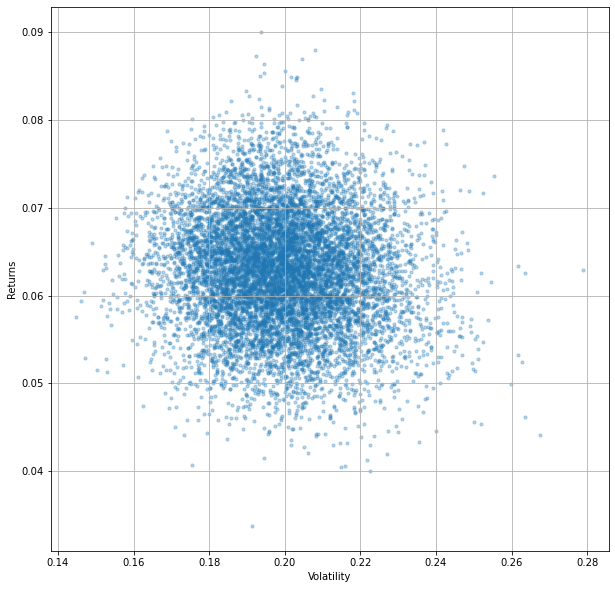

In [33]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [34]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]                       
min_vol_port

Returns        0.057550
Volatility     0.144755
VNM weight     0.074105
DCOM weight    0.097822
HFC weight     0.009945
MDYG weight    0.206229
OGS weight     0.005894
BSJM weight    0.432059
CNA weight     0.002654
BSL weight     0.044393
BG weight      0.126899
Name: 6486, dtype: float64

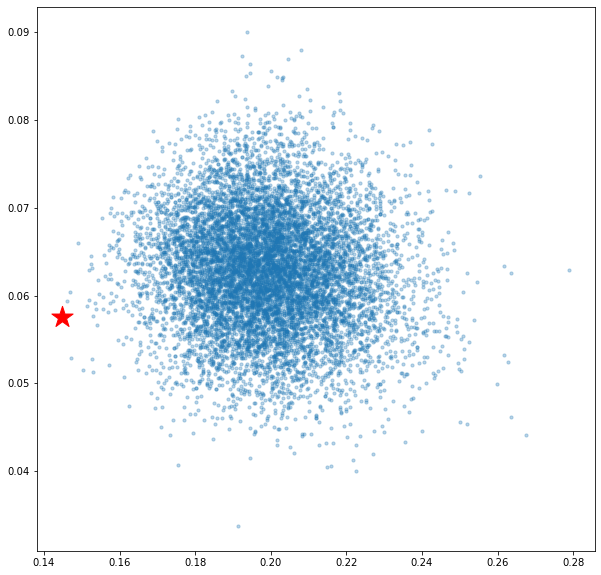

In [35]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [36]:
# Finding the optimal portfolio
Rf=4
annRiskFreeRate = Rf/100
rf = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
#rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.090021
Volatility     0.193822
VNM weight     0.253368
DCOM weight    0.031699
HFC weight     0.013550
MDYG weight    0.325547
OGS weight     0.060938
BSJM weight    0.018027
CNA weight     0.103358
BSL weight     0.039034
BG weight      0.154479
Name: 1250, dtype: float64

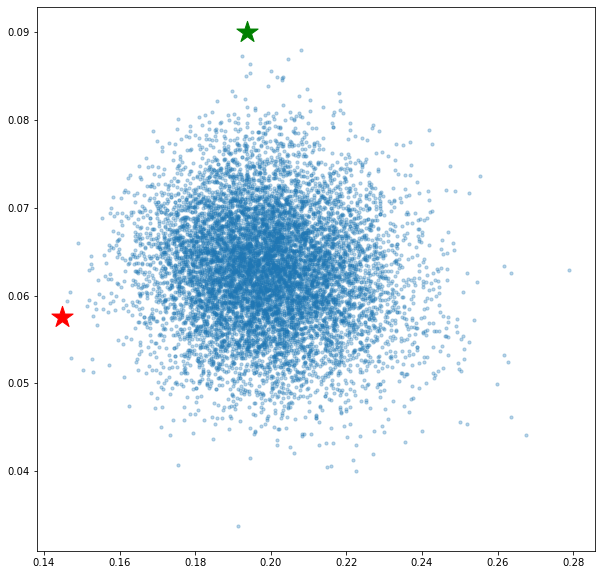

In [37]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)